### Module: Applied Statistics
### Author: Stefania Verduga

#### Task 1: Permutations and Combinations
Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.

Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.

Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error.

Would you accept two errors? Explain.

In [1]:
# Imports
import math
import itertools
import random
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

1. ### Permutations
Permutation is the arrangement of items in a specific order. The order matters in permutations.
Suppose we have three letters: A, B and C. How many ways can we arrange two of these letters?
Possible arrangements are: AB, BA, AC, CA, BC, CB.

2. ### Combinations
Combination is a selection of items where the order does not matter. We only focus on the item chosen and not the sequence in which they appear.
Using the same set of letter explained above: A, B and C. How many ways can we select two of these letters?
Possible selections are: AB, AC, BC. We should take into account that AB and BA are considered the same combination as order does not matter.

In the "Lady Tasting Tea" experiment we are going to select six cups out of twelve, where the order does not matter, so it's a combination problem. We are calculating how many ways someone could randomly select six cups, and figure out the probablity of selecting the correct ones.

### Cups of Tea

In [2]:
# Number of cups of tea in total.
no_cups = 12

# Number of cups of tea with milk in first.
no_cups_milk_first = 6

# Number of cups of tea with tea in first.
no_cups_tea_first = 6

In [3]:
# Number of ways of selecting six cups from twelve.
ways = math.comb(no_cups, no_cups_milk_first)

# Show.
ways

924

### math.comb

In order to better study the probablility of selecting the correct six cups in this experiment, I am using the module math from Python.
https://docs.python.org/3/library/math.html#math.comb

In [4]:
# Number of cups of tea in total.
n = 12

# Number of cups of tea with milk in first.
k = 6

### math.factorial
https://docs.python.org/3/library/math.html#math.factorial

In [5]:
math.factorial(n)

479001600

In [6]:
# Twelve factorial.
math.factorial(n)

479001600

In [7]:
# Six factorial.
math.factorial(k)

720

In [8]:
# Six factorial.
math.factorial(n - k)

720

In [9]:
# Number of ways of selecting k objects from n without replacement and without order.
math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

924

### Results
https://docs.python.org/3/library/itertools.html#itertools.combinations

In [10]:
# The cup labels.
labels = list(range(no_cups))

# Show.
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [11]:
# Different ways of selecting no_cups_milk_first out of no_cups of tea.
combs = list(itertools.combinations(labels, no_cups_milk_first))

# Show only the first and last 5 combinations.
combs_short = combs[:5] + ["..."] + combs[-5:]
combs_short

[(0, 1, 2, 3, 4, 5),
 (0, 1, 2, 3, 4, 6),
 (0, 1, 2, 3, 4, 7),
 (0, 1, 2, 3, 4, 8),
 (0, 1, 2, 3, 4, 9),
 '...',
 (5, 6, 7, 8, 10, 11),
 (5, 6, 7, 9, 10, 11),
 (5, 6, 8, 9, 10, 11),
 (5, 7, 8, 9, 10, 11),
 (6, 7, 8, 9, 10, 11)]

### Combination Formula

The combination formula is:

$$
C(n, k) = \frac{n!}{k!(n - k)!}
$$

This combination function calculates the number of ways to choose k items from n items, where the order does not matter.


In [12]:
# Function to calculate combinations.

def combinations(n, k):
    return math.comb(n, k)

### Probability of guessing all 6 cups.

- There are 12 cups in total, 6 of which have milk in first. We need to calculate how many ways we can select 6 cups from 12, which is given by combinations(12, 6).
- Since there is only 1 correct combination (the exact 6 cups with milk first), the probability of guessing all 6 cups correctly is:
$$
P(all\ correct) = \frac{1}{C(12,6)}
$$


In [13]:
# Probability of guessing all 6 cups correctly.

total_combinations = combinations(12, 6)
prob_6_correct = 1 / total_combinations

# Show
prob_6_correct

0.0010822510822510823

### Probability of guessing exactly 5 correct.

The person guesses 5 cups correctly and 1 incorrectly. This happens by:
- Choosing 5 correct cups from the 6 actual cups with milk first (combinations(6, 5)).
- Choosing 1 incorrect cup from the 6 cups where tea was poured first (combinations(6, 1)).

The total probability of guessing exactly 5 correct is:
$$
P(5\ correct) = \frac{C(6,5)\ x\ C(6,1)}{C(12,6)}
$$

In [14]:
# Probability of guessing exactly 5 correctly.

prob_5_correct = (combinations(6, 5) * combinations(6, 1)) / total_combinations

# Show.
prob_5_correct

0.03896103896103896

### Probability of guessing exactly 4 correct.

The person guesses 4 cups correctly and 2 incorrectly. This happens by:
- Choosing 4 correct cups from the 6 actual cups with milk first (combinations(6, 4)).
- Choosing 2 incorrect cups from the 6 cups where tea was poured first (combinations(6, 2)).

The total probability of guessing exactly 4 correct is:
$$
P(4\ correct) = \frac{C(6,4)\ x\ C(6,2)}{C(12,6)}
$$

In [15]:
# Probability of guessing exactly 5 correctly.

prob_4_correct = (combinations(6, 4) * combinations(6, 2)) / total_combinations

# Show.
prob_4_correct

0.2435064935064935

### Probability of guessing at least 5 correct.

This is the probability of guessing either all 6 cups correctly or exactly 5 cups correctly (at most 1 error). It's the sum of both probabilities:
$$
P(at\ least\ 4\ correct) = P(6\ correct) + P(5\ correct)
$$

In [16]:
# Probability of guessing at least 5 correctly (at most one error).

prob_at_least_5_correct = prob_6_correct + prob_5_correct

# Show.
prob_at_least_5_correct

0.04004329004329004

### Hypothesis Test for the Lady Tasting Tea Experiment.

#### Hypotheses:
- **Null Hypothesis (H₀)**: The person does not have the ability to distinguish whether milk or tea was added first. If they’re just guessing, any correct answers would be due to pure chance.
- **Alternative Hypothesis (H₁)**: The person does have the ability to distinguish whether milk or tea was added first. They would perform better than random guessing.

https://en.wikipedia.org/wiki/Statistical_hypothesis_test

#### Calculations:
In this hypothesis testing, I am setting a significance level (5%, or α=0.05) to decide when to reject the null hypothesis.

1. **Probability of selecting all 6 cups correctly (P = 1 / C(12, 6))**: This represents the chance of a correct selection if the person is merely guessing. This probability is very low (around 0.1%), indicating that the chance of correctly identifying all 6 cups purely by guessing is quite unlikely.

2. **Probability of selecting exactly 5 cups correctly (P = C(6, 5) * C(6, 1) / C(12, 6))**: This is the probability of getting exactly 5 correct guesses and 1 incorrect guess. 
This probability is also relatively low, approximately 3.9%. If the person guesses exactly 5 cups correctly, it’s still unlikely under random guessing. Achieving exactly 5 correct selections by guessing could happen by chance, but it would still lean toward rejecting the null hypothesis

3. **Probability of getting at least 5 correct guesses**: This is the sum of the probabilities of getting 6 correct and exactly 5 correct, representing the event where the person makes at most one error.
This combined probability is around 4%, it’s low enough to suggest that achieving at least 5 correct selections purely by guessing is unlikely.
If the person achieves at least 5 correct, it would give us reason to reject the null hypothesis and suggest that the person may indeed have a special ability to distinguish between the cups.

#### Conclusion:
Given the low probability of achieving at least 5 correct selections under the null hypothesis (0.04004 or 4%), we would consider rejecting the null hypothesis if the person correctly identifies at least 5 cups. This suggests that the person’s performance is unlikely to be due to random guessing, implying some ability to distinguish between the tea-first and milk-first cups.


#### Task 2: Numpy's Normal Distribution
In this task you will assess whether numpy.random.normal() properly generates normal values. To begin, generate a sample of one hundred thousand values using the function with mean 10.0 and standard deviation 3.0.

Use the scipy.stats.shapiro() function to test whether your sample came from a normal distribution. Explain the results and output.

Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.

### Generate a sample.

The first step in this case is to generate one hundred thousand values from a normal distribution with a mean of 10.0 and standard deviation of 3.0. I will need to use numpy.random.normal() to do this.

In [17]:
# Generate a sample.

mean = 10.0
std_dev = 3.0
sample_size = 100000

# Generate 100k random values from a normal distribution.

sample = np.random.normal(loc=mean, scale=std_dev, size=sample_size)

# Show.
sample

array([11.08524509,  9.48022806, 16.97993151, ..., 12.33901977,
        9.95226452,  8.20848328])

### Shapiro-Wilk Test.

This test checks whether the generated sample follows a Normal Distribution. The p-value will determine if we can reject the null hypothesis of normality. The test statistic W is computed using the following formula:

$$
W = \frac{\left( \sum_{i=1}^{n} a_i x_{(i)} \right)^2}{\sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

where:
- \( W \): Shapiro-Wilk test statistic.
- \( x_{(i)} \): Ordered sample values (sorted from smallest to largest).
- \( \bar{x} \): Sample mean.
- \( a_i \): Weights calculated from expected values of the order statistics of a sample from a normal distribution.
- \( n \): Sample size.

A low value of W (close to 0) suggests that the sample is not normally distributed.
A high value of W (close to 1) suggests the sample data is normally distributed.

The p-value will determine if you can reject the null hypothesis of normality.

- If **p_value < 0.05**, it suggests that the data is not normally distributed, which would be unexpected given you generated the data from a normal distribution.
- If **p_value >= 0.05**, it suggests that the sample data is likely normally distributed.

https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test

In [18]:
# Perform the Shapiro-Wilk test for normality.
shapiro_stat, p_value = stats.shapiro(sample[:5000])  # Subset of data (Shapiro is sensitive to large sizes).

# Output test result.
print(f"Shapiro-Wilk Test Statistic: {shapiro_stat}")
print(f"p-value: {p_value}")
if p_value < 0.05:
    print("The null hypothesis of normality is rejected (data is not normal).")
else:
    print("The null hypothesis of normality is not rejected (data is normal).")


Shapiro-Wilk Test Statistic: 0.9996767685246568
p-value: 0.6360646356796261
The null hypothesis of normality is not rejected (data is normal).


### Histogram and Probability Density Function Plot.

The histogram provides a visual representation of the distribution of the sample values.
The Probability Density Function of a normal distribution with mean = 10 and std_dev = 3 is plotted to check visually if the generated data fits the expected normal distribution.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
https://numpy.org/devdocs/reference/generated/numpy.linspace.html

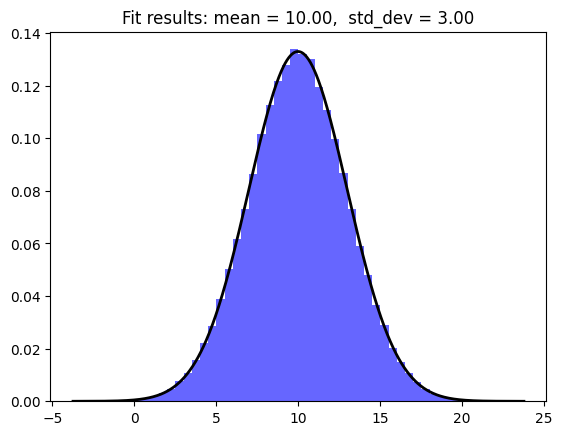

In [19]:
# Plot a histogram and the normal distribution.

# Plot the histogram of the sample.
plt.hist(sample, bins=50, density=True, alpha=0.6, color='b')

# Define the Probability Density Function of the normal distribution.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = stats.norm.pdf(x, mean, std_dev)

# Plot the Probability Density Function on top of the histogram.
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mean = %.2f,  std_dev = %.2f" % (mean, std_dev)
plt.title(title)

# Show plot
plt.show()

#### Task 3: t-Test Calculation
Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.

| Patient ID | 0  | 1  | 2  | 3  | 4  | 5  | 6  | 7  | 8  | 9  |
|------------|----|----|----|----|----|----|----|----|----|----|
| Before     | 63 | 68 | 70 | 64 | 74 | 67 | 70 | 57 | 66 | 65 |
| After      | 64 | 64 | 68 | 64 | 73 | 70 | 72 | 54 | 61 | 63 |

Calculate the t-statistic based on this data set, using Python. Compare it to the value given by scipy.stats. Explain your work and list any sources used.

### What is the t-Test Statistic?

The t-Test Statistic is a measure used in statistical hypothesis testing to determine whether there is a significant difference between the means of two groups or conditions. Specifically, the paired t-Test checks whether the mean between paired observations (e.g., before and after measurements) is significantly different from zero.

### How does the t-Test work?

1. #### Hypothesis
- Null Hypothesis (H0): The mean difference between the paired samples is zero ($\mu_d = 0$).
- Alternative Hypothesis (𝐻𝑎): The mean difference is not zero ($H_a: \mu_d \neq 0$)

2. #### Formula for the t-Test statistic.
The t-Test statistic is calculated using the formula:

$t = \frac{\bar{d}}{s_d / \sqrt{n}}$

Where:
- ${\bar{d}}$: Mean of the differences between paired samples.
- ${s_d}$ : Sample standard deviation of the differences.
- ${n}$ : Number of paired observations.

3. #### Distribution
- The t-Test statistic follows a t-distribution with ${n-1}$ degrees of freedom ${df = {n-1}}$ when the null hypothesis is true.
- The shape of the t-distribution depends on the sample size:
    - For small samples ${n<30}$, it is wider and has heavier tails than the normal distribution.
    - For large samples, it approaches the normal distribution.

4. #### P-value
- The p-value is the probability of observing a t-statistic as extreme as the calculated one if the null hypothesis is true.
- A small p-value (e.g.,${p<0.05}$) suggests rejecting the null hypothesis, indicating a significant difference.

### Defining the data and Resolution.
In the specific case of this task, we have the following data:

- The 'before' and 'after' variables are arrays representing the resting heart rates of ten patients before and after the exercise program.
- These values are paired because each 'before' corresponds to the same patient as the respective 'after'.

In [20]:
# Data from the exercise
before = np.array([63, 68, 70, 64, 74, 67, 70, 57, 66, 65])
after = np.array([64, 64, 68, 64, 73, 70, 72, 54, 61, 63])

In [21]:
# Calculation of the t-statistic

differences = before - after
n = len(differences) # Number of patients
mean_diff = np.mean(differences) # Mean of the differences
std_diff = np.std(differences, ddof=1) # Sample standard deviation of the differences
t_statistic = mean_diff / (std_diff / np.sqrt(n)) # t-statistic formula

print (t_statistic)

1.3372274824806283


### References

https://datatab.net/tutorial/t-test\
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#ttest-ind